<img src="ml2_group_assignment.png" width="800"/>

<a id='0'></a>
# <font color=green> Libraries used </font>

In [1]:
#!pip install squarify
#!pip install htmltabletomd

In [2]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns  # Graphing
import matplotlib.pyplot as plt
import squarify #treemap
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go
import xgboost as xgb
import scipy.stats as stats
import htmltabletomd

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
from sklearn import linear_model



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif

from scipy.stats import norm


from yellowbrick.target import FeatureCorrelation
from yellowbrick.classifier import ROCAUC


from plotly.subplots import make_subplots

from itertools import combinations

from numpy import percentile

warnings.simplefilter(action='ignore', category=FutureWarning)

<a id='0'></a>
##  <font color=green>1.Import the Data </font>

Let’s load the test data and create a data frame

In [6]:
data_test = pd.read_csv("test.csv")

In [7]:
data_test.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,...,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000
mean,298066.500000,2964.977407,155.629558,14.039635,270.556622,46.294408,2367.143116,212.131133,223.435026,142.726951,...,0.044768,0.091588,0.078704,0.002808,0.003161,0.000193,0.000467,0.026233,0.023236,0.014651
std,163359.093603,273.157030,111.962120,7.450155,212.500153,58.209469,1561.482002,26.661063,19.668053,38.030094,...,0.206795,0.288444,0.269277,0.052916,0.056137,0.013877,0.021594,0.159827,0.150652,0.120152
min,15121.000000,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156593.750000,2818.000000,58.000000,9.000000,108.000000,7.000000,1116.000000,198.000000,213.000000,119.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,298066.500000,2999.000000,127.000000,13.000000,228.000000,29.000000,2018.000000,218.000000,226.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,439539.250000,3164.000000,260.000000,18.000000,390.000000,69.000000,3349.000000,231.000000,237.000000,168.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,581012.000000,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data_test.shape

(565892, 55)

In [11]:
data_test.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

At this stage we have confirmed that the test data is complete, compatible with the train data and has no missing values. 

<a id='0'></a>
##  <font color=green>2.Creating new features </font>

We will create the same features created in our train data-set

<a id='2.1'></a>
### <font color=green> 2.1 Bivariate Combinations <font>

In [13]:
column_list = data_test.columns
filtered_column_list = [column for column in column_list if 'Soil_Type' not in column and 'Wilderness_Area' not in column and 'Id' not in column ] 
interactions = list(combinations(filtered_column_list, 2))
interactions

[('Elevation', 'Aspect'),
 ('Elevation', 'Slope'),
 ('Elevation', 'Horizontal_Distance_To_Hydrology'),
 ('Elevation', 'Vertical_Distance_To_Hydrology'),
 ('Elevation', 'Horizontal_Distance_To_Roadways'),
 ('Elevation', 'Hillshade_9am'),
 ('Elevation', 'Hillshade_Noon'),
 ('Elevation', 'Hillshade_3pm'),
 ('Elevation', 'Horizontal_Distance_To_Fire_Points'),
 ('Aspect', 'Slope'),
 ('Aspect', 'Horizontal_Distance_To_Hydrology'),
 ('Aspect', 'Vertical_Distance_To_Hydrology'),
 ('Aspect', 'Horizontal_Distance_To_Roadways'),
 ('Aspect', 'Hillshade_9am'),
 ('Aspect', 'Hillshade_Noon'),
 ('Aspect', 'Hillshade_3pm'),
 ('Aspect', 'Horizontal_Distance_To_Fire_Points'),
 ('Slope', 'Horizontal_Distance_To_Hydrology'),
 ('Slope', 'Vertical_Distance_To_Hydrology'),
 ('Slope', 'Horizontal_Distance_To_Roadways'),
 ('Slope', 'Hillshade_9am'),
 ('Slope', 'Hillshade_Noon'),
 ('Slope', 'Hillshade_3pm'),
 ('Slope', 'Horizontal_Distance_To_Fire_Points'),
 ('Horizontal_Distance_To_Hydrology', 'Vertical_Distanc

Add the top  interaction features (which exclude a categorical variable) to existing DF for feature engineered model

In [ ]:
data_train

Addition and division has been taken out as it created a lot of noise in the data. The division makes sense if it has a business meaning and the addition only if it is the same scale. However we will add the variables which have the same metrics together in a second step but not in a for loop. 

In [ ]:
for (key, value) in interactions:
    data_train[key + '_x_' + value] = data_train[key] * data_train[value]
    #data_train[key + '_+_' + value] = data_train[key] + data_train[value]
    #data_train[key + '_divide_' + value] = data_train[key] / data_train[value]

In [ ]:
# Adding only variables with the same metric scale like meters, index, etc 


In [ ]:
pd.set_option('display.max_columns', None)
data_train

<a id='5.2.2'></a>
### <font color=green> 5.2.2 Polynomial Features <font>
    
We have just seen how to make two variables interact together,but sometimes the relationship between dependent and independent variables are more complex and not linear. Polynomials is another way to create new features! A very strong (usually) option for new features is increasing the power of a single variable. For our purposes, we will try and see if all the existing variables, can improve our Baseline by being increased in power.<br>
Source: https://towardsdatascience.com/feature-engineering-combination-polynomial-features-3caa4c77a755

In [ ]:
X_train_int_pf = data_train.iloc[:, 1:10]
X_train_int_pf

In [ ]:
def PolynomialFeatures_labeled(input_df,power):
    '''Basically this is a cover for the sklearn preprocessing function. 
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns. 

    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power) 
    power = what order polynomial you want variables up to. (use the same power as you want entered into pp.PolynomialFeatures(power) directly)

    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and 
    outputs a labeled pandas dataframe   
    '''
    poly = PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df



Polynominal features of degree two, since we have already enough information, we will not go for Polynominal three

In [ ]:
output_df_pw2 = PolynomialFeatures_labeled(X_train_int_pf,2)
pd.set_option('display.max_columns', None)
output_df_pw2.shape

Few information are doubled with the previous dataframe, so we will have unique values, without ^1  as these columns are not needed 

In [ ]:
column_list = output_df_pw2.columns
cols = [column for column in column_list if '^1' not in column]
output_df_pw2=output_df_pw2[cols]
output_df_pw2

In [ ]:
data_train = pd.concat([data_train,output_df_pw2], axis=1)
data_train

In [ ]:
output_df_pw3 = PolynomialFeatures_labeled(X_train_int_pf,3)
output_df_pw3

<a id='5.2.3'></a>
### <font color=green> 5.2.3 ID <font>

In [ ]:
#We agree for the test to not remove ID because the ID is the unique indentifier to evaluate
data_train.drop('Id',axis = 1, inplace = True)

<a id='5.2.4'></a>
### <font color=green> 5.2.4 Distance To Hydrology <font>
#### <font color=green> New Features <font>

We combine Vertical distance to Hydrology and Horizontal distance to Hydrology since these two are highly correlated and also we can transform it into one variable which would give the distance to the closest water surface and using Pythagoras 
theorem for Distance calculation, since we have the horizontal and the vertical Distance. 
Source : https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9

In [ ]:
data_train['Distance_To_Hydrology'] = data_train['Horizontal_Distance_To_Hydrology']**2 +data_train['Vertical_Distance_To_Hydrology']**2
data_train['Distance_To_Hydrology'] = data_train['Distance_To_Hydrology']**0.5
data_train.head()

#### <font color=green> Square root and logarithm Transformation  <font>

Now we are checking the distribution of the new created variable if further transformation is needed. The Distance to Hydrology is still positive skewed and has zero values. In order to use log we will use log + 1 in order to use logarithm with zero values. 

Source: https://www.youtube.com/watch?v=_c3dVTRIK9c and 

Source_2: https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9

As a rule of thump, the skewness can be interpreted as follows:
<img src="Skew.png" width=400 height=200 align="center">

Source: https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

In [ ]:
print('\033[95m'+"Skew before transformation\n", data_train['Distance_To_Hydrology'].skew(), 
      "\nmin\n", data_train['Distance_To_Hydrology'].min(),
      "\nmax\n", data_train['Distance_To_Hydrology'].max(),)

In [ ]:
#Using the log10+ 1 logarithm 
data_train['log10_Distance_To_Hydrology'] = np.log10(data_train['Distance_To_Hydrology']+1)

In [ ]:
#Using the square root 
data_train['sqr_Distance_To_Hydrology'] = data_train['Distance_To_Hydrology']**0.5

#### <font color=green> Results after logarithm and <font color=darkcyan> Sqrare root Transformation<font>

In [ ]:
print('\033[92m' +"Skew after Log transformation\n", data_train['log10_Distance_To_Hydrology'].skew(), 
      "\nmin\n", data_train['log10_Distance_To_Hydrology'].min(),
      "\nmax\n", data_train['log10_Distance_To_Hydrology'].max(),)

In [ ]:
print('\033[96m'+ "Skew after Square Root Transformation\n", data_train['sqr_Distance_To_Hydrology'].skew(), 
      "\nmin\n", data_train['sqr_Distance_To_Hydrology'].min(),
      "\nmax\n", data_train['sqr_Distance_To_Hydrology'].max(),)

In [ ]:

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,15))
f.add_subplot(331)
histPlot(data_train['Distance_To_Hydrology'], 'purple')
f.add_subplot(332)
histPlot(data_train['log10_Distance_To_Hydrology'], 'green')
f.add_subplot(333)
histPlot(data_train['sqr_Distance_To_Hydrology'], 'c')

As you can see above, for distance to Hydrology the __square root__ showed a better performance in terms of skewness and is closer to a normal bell shaped than the logarithm transformation. We will be using Square Root as a new feature in the dataset and will frop the others from the dataset.  

In [ ]:
data_train.drop(['log10_Distance_To_Hydrology'], axis=1,inplace=True)

<a id='5.2.5'></a>
### <font color=green> 5.2.5 Horizontal Distance To Roadways <font>

#### <font color=green> Square root and logarithm Transformation  <font>

For log transformation there should be no zeros, negative values and the distribution should be positive skewed( bigger than 1 is positive) hence we are using the square root as you can see for logarithm transformation below the distribution did not improve!!!

In [ ]:
print('\033[95m'+"Skew before Transformation\n", data_train['Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin before Transformation\n", data_train['Horizontal_Distance_To_Roadways'].min(),
      "\nmax before Transformation\n", data_train['Horizontal_Distance_To_Roadways'].max(),)

#### <font color=green> Results after logarithm and <font color=darkcyan> Square root Transformation<font>

In [ ]:
# since we have null values we add plus 1 to avoid log of zero.We are using natural log and log10
data_train['Sqr_Horizontal_Distance_To_Roadways'] = data_train['Horizontal_Distance_To_Roadways']**0.5
data_train['log_Horizontal_Distance_To_Roadways'] = np.log(data_train['Horizontal_Distance_To_Roadways']+1)
data_train['log10_Horizontal_Distance_To_Roadways'] = np.log10(data_train['Horizontal_Distance_To_Roadways']+1)

In [ ]:
print('\033[96m'+ "Skew after Square Root Transformation\n", data_train['Sqr_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin \n", data_train['Sqr_Horizontal_Distance_To_Roadways'].min(),
      "\nmax \n", data_train['Sqr_Horizontal_Distance_To_Roadways'].max(),)


In [ ]:
print('\033[92m' +"Skew after log Transformation\n", data_train['log_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin\n", data_train['log_Horizontal_Distance_To_Roadways'].min(),
      "\nmax\n", data_train['log_Horizontal_Distance_To_Roadways'].max(),)

In [ ]:
print('\033[92m'+ "Skew after log10 transformation\n", data_train['log10_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin \n", data_train['log10_Horizontal_Distance_To_Roadways'].min(),
      "\nmax \n", data_train['log10_Horizontal_Distance_To_Roadways'].max(),)

In [ ]:
# testing if the sqaure root is normally distributed and it shows it is not, however it is less skewed than before
stats.normaltest(data_train['Sqr_Horizontal_Distance_To_Roadways'])

In [ ]:
def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(15,10))
f.add_subplot(331)
histPlot(data_train['Horizontal_Distance_To_Roadways'], 'purple')
f.add_subplot(334)
histPlot(data_train['log_Horizontal_Distance_To_Roadways'], 'green')
f.add_subplot(335)
histPlot(data_train['log10_Horizontal_Distance_To_Roadways'], 'green')
f.add_subplot(332)
histPlot(data_train['Sqr_Horizontal_Distance_To_Roadways'], 'c')

We achieved the best result for square root of the Horizontal Distance to Roadways. 

In [ ]:
data_train.drop(['log_Horizontal_Distance_To_Roadways','log10_Horizontal_Distance_To_Roadways'], axis=1,inplace=True)

<a id='5.2.6'></a>
### <font color=green> 5.2.6 Slope <font>
#### <font color=green> Square root and logarithm Transformation  <font>

In [ ]:
print('\033[95m'+ "Skew before transformation\n", data_train['Slope'].skew(), 
      "\nmin\n", data_train['Slope'].min(),
      "\nmax \n", data_train['Slope'].max(),)

#### <font color=green> Results after logarithm and <font color=darkcyan> Sqrare root Transformation<font>

In [ ]:
# since we have null values we add plus 1 to avoid log of zero
data_train['logSlope'] = np.log(data_train['Slope']+1)

In [ ]:
print('\033[92m'+"Skew after log transformation\n", data_train['logSlope'].skew(), 
      "\nmin\n", data_train['logSlope'].min(),
      "\nmax\n", data_train['logSlope'].max(),)

In [ ]:
data_train['SqrSlope'] = data_train['Slope']**0.5

In [ ]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['SqrSlope'].skew(), 
      "\nmin\n", data_train['SqrSlope'].min(),
      "\nmax\n", data_train['SqrSlope'].max(),)

In [ ]:
def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(15,10))
f.add_subplot(331)
histPlot(data_train['Slope'], 'purple')
f.add_subplot(332)
histPlot(data_train['logSlope'], 'green')
f.add_subplot(333)
histPlot(data_train['SqrSlope'], 'c')

Since the skweness for the slope shows better performance when using the square root, we will transform the variable into square root as well. 

In [ ]:
data_train.drop(['logSlope'], axis=1,inplace=True)

<a id='5.2.7'></a>
### <font color=green> 5.2.7 Horizontal Distance To Fire Points  <font>
#### <font color=green> Transformation  <font>

In [ ]:
print('\033[95m'+"Skew before transformation\n", data_train['Horizontal_Distance_To_Fire_Points'].skew(), 
      "\nmin\n", data_train['Horizontal_Distance_To_Fire_Points'].min(),
      "\nmax\n", data_train['Horizontal_Distance_To_Fire_Points'].max(),)

#### <font color=green> Results after logarithm and <font color=darkcyan> Sqrare root Transformation<font>

In [ ]:
# since we have null values we add plus 1 to avoid log of zero
data_train['log_Horizontal_Distance_To_firepoints'] = np.log(data_train['Horizontal_Distance_To_Fire_Points']+1)

In [ ]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Horizontal_Distance_To_firepoints'].skew(), 
      "\nmin\n", data_train['log_Horizontal_Distance_To_firepoints'].min(),
      "\nmax\n", data_train['log_Horizontal_Distance_To_firepoints'].max(),)

In [ ]:
#Transform with square root
data_train['sqr_Horizontal_Distance_To_firepoints'] = data_train['Horizontal_Distance_To_Fire_Points']**0.5

In [ ]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Horizontal_Distance_To_firepoints'].skew(), 
      "\nmin\n", data_train['sqr_Horizontal_Distance_To_firepoints'].min(),
      "\nmax\n", data_train['sqr_Horizontal_Distance_To_firepoints'].max(),)

In [ ]:
def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(15,10))
f.add_subplot(331)
histPlot(data_train['Horizontal_Distance_To_Fire_Points'], 'purple')
f.add_subplot(332)
histPlot(data_train['log_Horizontal_Distance_To_firepoints'], 'green')
f.add_subplot(333)
histPlot(data_train['sqr_Horizontal_Distance_To_firepoints'], 'c')

Since square root transformation gives the best result in skewness, we will also use sqr for the feature variable.

In [ ]:
data_train.drop(['log_Horizontal_Distance_To_firepoints'], axis=1,inplace=True)

<a id='5.2.8'></a>
### <font color=green> 5.2.8 Hillshades <font>
<a id='5.2.8.1'></a>
### <font color=green> 5.2.8.1 Mean Hillshade <font>
#### <font color=green> Creation of new Feature: Mean Hillshade <font>

In [ ]:
# We take the average of Hillshades,which gives you the average light exposure of each cover type during the day
data_train['Mean_Hillshade'] = (data_train['Hillshade_9am']+data_train['Hillshade_Noon']+data_train['Hillshade_3pm'])/3

In [ ]:
#Itensity of the Hillshade variables in 3 bin siizes with the bin discretizer
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
data_train['Mean_Hillshade_bin'] = est.fit_transform(data_train[['Mean_Hillshade']])

In [ ]:
data_train[['Mean_Hillshade_bin','Mean_Hillshade']].describe()

In [ ]:
print('\033[95m'+"Skew before transformation\n", data_train['Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['Mean_Hillshade'].min(),
      "\nmax\n", data_train['Mean_Hillshade'].max(),)

#### <font color=green> Results after logarithm Transformation <font color=darkcyan>, Square root Transformation<font color=gold> and BoxCox Transformation<font>

In [ ]:
data_train['log_Mean_Hillshade'] = np.log(data_train['Mean_Hillshade'])

In [ ]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['log_Mean_Hillshade'].min(),
      "\nmax\n", data_train['log_Mean_Hillshade'].max(),)

In [ ]:
data_train['log10Mean_Hillshade'] = np.log10(data_train['Mean_Hillshade'])

In [ ]:
print('\033[92m'+"Skew after log10 transformation\n", data_train['log10Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['log10Mean_Hillshade'].min(),
      "\nmax\n", data_train['log10Mean_Hillshade'].max(),)

In [ ]:
data_train['sqr_Mean_Hillshade'] = data_train['Mean_Hillshade']**0.5

In [ ]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['sqr_Mean_Hillshade'].min(),
      "\nmax\n", data_train['sqr_Mean_Hillshade'].max(),)

In [ ]:
#Now, the Box-Cox transformation also requires our data to only contain positive numbers
# transform training data with Boxcox
data_train['Mean_Hillshade_boxcox'], _ = stats.boxcox(data_train['Mean_Hillshade'])

In [ ]:
print('\033[93m'+"Skew after Boxcox transformation\n", data_train['Mean_Hillshade_boxcox'].skew(), 
      "\nmin\n", data_train['Mean_Hillshade_boxcox'].min(),
      "\nmax\n", data_train['Mean_Hillshade_boxcox'].max(),)

In [ ]:
stats.normaltest(data_train['Mean_Hillshade_boxcox'])

In [ ]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Mean_Hillshade'], 'purple')
f.add_subplot(335)
histPlot(data_train['log_Mean_Hillshade'], 'green')
f.add_subplot(334)
histPlot(data_train['Mean_Hillshade_boxcox'], 'gold')                    
f.add_subplot(332)
histPlot(data_train['sqr_Mean_Hillshade'], 'c')

The distribution did not improve with Square Root and Logarithms Transformation. Hence we use BoxCox which improved the distribution substantially. 

In [ ]:
data_train.drop(['log10Mean_Hillshade','log_Mean_Hillshade','sqr_Mean_Hillshade'], axis=1,inplace=True)

<a id='5.2.8.2'></a>
### <font color=green> 5.2.8.2 Hillshade 9am <font>
#### <font color=green> Transformation  <font>

In [ ]:
print('\033[95m'+"Skew before transformation\n", data_train['Hillshade_9am'].skew(), 
      "\nmin\n", data_train['Hillshade_9am'].min(),
      "\nmax\n", data_train['Hillshade_9am'].max(),)

#### <font color=green> Results after logarithm Transformation <font color=darkcyan>, Square root Transformation<font color=gold> and BoxCox Transformation<font>

In [ ]:
data_train['log_Hillshade_9am'] = np.log(data_train['Hillshade_9am']+1)

In [ ]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Hillshade_9am'].skew(), 
      "\nmin\n", data_train['log_Hillshade_9am'].min(),
      "\nmax\n", data_train['log_Hillshade_9am'].max(),)

In [ ]:
data_train['sqr_Hillshade_9am'] = data_train['Hillshade_9am']**0.5

In [ ]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Hillshade_9am'].skew(), 
      "\nmin\n", data_train['sqr_Hillshade_9am'].min(),
      "\nmax\n", data_train['sqr_Hillshade_9am'].max(),)

In [ ]:
#Now, the Box-Cox transformation also requires our data to only contain positive numbers, transform training data with Boxcox
data_train['Hillshade_9am_boxcox'], lam  = stats.boxcox(data_train['Hillshade_9am']+1)
#lam is the best lambda for the distribution

In [ ]:
print('\033[93m'+"Skew after Boxcox transformation\n", data_train['Hillshade_9am_boxcox'].skew(), 
      "\nmin\n", data_train['Hillshade_9am_boxcox'].min(),
      "\nmax\n", data_train['Hillshade_9am_boxcox'].max(),)

In [ ]:
def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Hillshade_9am'], 'purple')
f.add_subplot(335)
histPlot(data_train['log_Hillshade_9am'], 'green')
f.add_subplot(334)
histPlot(data_train['Hillshade_9am_boxcox'], 'gold')                    
f.add_subplot(332)
histPlot(data_train['sqr_Hillshade_9am'], 'c')

BoxCox outperforms the other two for the Hillshade 9am 

In [ ]:
data_train.drop(['log_Hillshade_9am','sqr_Hillshade_9am'], axis=1,inplace=True)

<a id='5.2.8.3'></a>
### <font color=green> 5.2.8.3 Hillshade Noon <font>
#### <font color=green> Transformation  <font>

In [ ]:
print('\033[95m'+"Skew before transformation\n", data_train['Hillshade_Noon'].skew(), 
      "\nmin\n", data_train['Hillshade_Noon'].min(),
      "\nmax\n", data_train['Hillshade_Noon'].max(),)

#### <font color=green> Results after logarithm Transformation <font color=darkcyan>, Square root Transformation<font color=gold> and BoxCox Transformation<font>

In [ ]:
data_train['log_Hillshade_Noon'] = np.log(data_train['Hillshade_Noon']+1)

In [ ]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Hillshade_Noon'].skew(), 
      "\nmin\n", data_train['log_Hillshade_Noon'].min(),
      "\nmax\n", data_train['log_Hillshade_Noon'].max(),)

In [ ]:
data_train['sqr_Hillshade_Noon'] = data_train['Hillshade_Noon']**0.5

In [ ]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Hillshade_Noon'].skew(), 
      "\nmin\n", data_train['sqr_Hillshade_Noon'].min(),
      "\nmax\n", data_train['sqr_Hillshade_Noon'].max(),)

In [ ]:
#Now, the Box-Cox transformation also requires our data to only contain positive numbers, transform training data with Boxcox
data_train['Hillshade_Noon_boxcox'], lam  = stats.boxcox(data_train['Hillshade_Noon'])
#lam is the best lambda for the distribution

In [ ]:
print('\033[93m'+"Skew after Boxcox transformation\n", data_train['Hillshade_Noon_boxcox'].skew(), 
      "\nmin\n", data_train['Hillshade_Noon_boxcox'].min(),
      "\nmax\n", data_train['Hillshade_Noon_boxcox'].max(),)

In [ ]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Hillshade_Noon'], 'purple')
f.add_subplot(335)
histPlot(data_train['log_Hillshade_Noon'], 'green')
f.add_subplot(334)
histPlot(data_train['Hillshade_Noon_boxcox'], 'gold')                    
f.add_subplot(332)
histPlot(data_train['sqr_Hillshade_Noon'], 'c')

Box Coc is outperforming the other transformations for Hillshade Noon

In [ ]:
data_train.drop(['log_Hillshade_Noon','sqr_Hillshade_Noon'], axis=1,inplace=True)

<a id='5.2.8.4'></a>
### <font color=green> 5.2.8.4 Hillshade 3pm <font>
#### <font color=green> Transformation  <font>

In [ ]:
print('\033[95m'+"Skew before transformation\n", data_train['Hillshade_3pm'].skew(), 
      "\nmin\n", data_train['Hillshade_3pm'].min(),
      "\nmax\n", data_train['Hillshade_3pm'].max(),)

#### <font color=green> Results after logarithm Transformation <font color=darkcyan>, Square root Transformation<font color=gold> and BoxCox Transformation<font>

In [ ]:
data_train['log_Hillshade_3pm'] = np.log(data_train['Hillshade_3pm']+1)

In [ ]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Hillshade_3pm'].skew(), 
      "\nmin\n", data_train['log_Hillshade_3pm'].min(),
      "\nmax\n", data_train['log_Hillshade_3pm'].max(),)

In [ ]:
data_train['sqr_Hillshade_3pm'] = data_train['Hillshade_3pm']**0.5

In [ ]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Hillshade_3pm'].skew(), 
      "\nmin\n", data_train['sqr_Hillshade_3pm'].min(),
      "\nmax\n", data_train['sqr_Hillshade_3pm'].max(),)

In [ ]:
#Now, the Box-Cox transformation also requires our data to only contain positive numbers, transform training data with Boxcox
data_train['Hillshade_3pm_boxcox'], lam  = stats.boxcox(data_train['Hillshade_3pm']+1)
#lam is the best lambda for the distribution

In [ ]:
print('\033[93m'+"Skew after Boxcox transformation\n", data_train['Hillshade_3pm_boxcox'].skew(), 
      "\nmin\n", data_train['Hillshade_3pm_boxcox'].min(),
      "\nmax\n", data_train['Hillshade_3pm_boxcox'].max(),)

In [ ]:
def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Hillshade_3pm'], 'purple')
f.add_subplot(335)
histPlot(data_train['log_Hillshade_3pm'], 'green')
f.add_subplot(334)
histPlot(data_train['Hillshade_3pm_boxcox'], 'gold')                    
f.add_subplot(332)
histPlot(data_train['sqr_Hillshade_3pm'], 'c')

For the Hillshade 3pm the data was not highly skwed, we either keep the original or we can use boxcox as it improved the variables as well. 

In [ ]:
data_train.drop(['log_Hillshade_3pm','sqr_Hillshade_3pm'], axis=1,inplace=True)

### <font color=green> 5.2.8.5 Hillshades  Ratios <font>

In [ ]:
data_train['ratio_Hillshade_3pm'] = data_train['Hillshade_3pm']/255
data_train['ratio_Hillshade_Noon'] = data_train['Hillshade_Noon']/255
data_train['ratio_Hillshade_9am'] = data_train['Hillshade_9am']/255

### <font color=green> 5.2.9.1 Aspect <font>
#### <font color=green> Transformation  <font>

In [ ]:
print('\033[95m'+"Skew before transformation\n", data_train['Aspect'].skew(), 
      "\nmin\n", data_train['Aspect'].min(),
      "\nmax\n", data_train['Aspect'].max(),)

#### <font color=green> Results after logarithm Transformation <font color=darkcyan>and Square root Transformation<font>

In [ ]:
data_train['sqr_Aspect'] = data_train['Aspect']**0.5

In [ ]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Aspect'].skew(), 
      "\nmin\n", data_train['sqr_Aspect'].min(),
      "\nmax\n", data_train['sqr_Aspect'].max(),)

In [ ]:
data_train['log_Aspect'] = np.log(data_train['Aspect']+1)

In [ ]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Aspect'].skew(), 
      "\nmin\n", data_train['log_Aspect'].min(),
      "\nmax\n", data_train['log_Aspect'].max(),)

In [ ]:


def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Aspect'], 'purple')
f.add_subplot(332)
histPlot(data_train['log_Aspect'], 'green')
#f.add_subplot(334)
#histPlot(data_train['Hillshade_3pm_boxcox'], 'gold')                    
f.add_subplot(333)
histPlot(data_train['sqr_Aspect'], 'c')

For aspect square root turned out to be the best transformation in terms of skweness. 

In [ ]:
data_train.drop(['log_Aspect'], axis=1,inplace=True)

### <font color=green> 5.2.8.5 Hillshades  Ratios <font>

In [ ]:
data_train['ratio_Hillshade_3pm'] = data_train['Hillshade_3pm']/255
data_train['ratio_Hillshade_Noon'] = data_train['Hillshade_Noon']/255
data_train['ratio_Hillshade_9am'] = data_train['Hillshade_9am']/255

### <font color=green> 5.2.9.2 Aspect in degrees <font>
#### <font color=green> New Features  <font>
The azimuth is the angular direction of the sun, measured from north clockwise in degrees from 0 to 360. An Azimuth of 90 degrees is east.The Cut of values will be between for instance the middle of north and east.

* Aspect_North: from 315 deg to 45 deg
* Aspect_East: from 45 deg to 135 deg
* Aspect_South: from 135 deg to 225 deg
* Aspect_West: from 225 deg to 315 deg    

<img src="angle_azimuth.png" width=400 height=200 align="center">
    
Source:https://www.pveducation.org/pvcdrom/properties-of-sunlight/azimuth-angle

In [ ]:
#Grouping Aspect in the four directions
data_train['Aspect_North']=  np.where(((data_train['Aspect']>=0) & (data_train['Aspect']<45))|((X_train['Aspect']>=315) & (X_train['Aspect']<=360)), 1 ,0)
data_train['Aspect_East']= np.where((data_train['Aspect']>=45) & (data_train['Aspect']<135), 1 ,0)
data_train['Aspect_South']= np.where((data_train['Aspect']>=135) & (data_train['Aspect']<225), 1 ,0)
data_train['Aspect_West']= np.where((data_train['Aspect']>=225) & (data_train['Aspect']<315), 1 ,0)

### <font color=green> 5.2.8 Elevation <font>

In [ ]:
#No transformation as it is already very symetric distributed 
print('\033[95m'+"Skew before transformation\n", data_train['Elevation'].skew(), 
      "\nmin\n", data_train['Elevation'].min(),
      "\nmax\n", data_train['Elevation'].max(),)

In [ ]:
#importing "math" for mathematical operations 
data_train['binned_elevation'] = [math.floor(v/50.0) for v in data_train['Elevation']]

Addition and Substraction on the same scale
Using for loop was giving us a bad performance hence we are using the features on the same scale which to add or substract 

In [ ]:
data_train['Road+Fire'] = data_train['Horizontal_Distance_To_Roadways'] + data_train['Horizontal_Distance_To_Fire_Points']
data_train['Road-Fire'] = abs(data_train['Horizontal_Distance_To_Roadways'] - data_train['Horizontal_Distance_To_Fire_Points'])
data_train['Road+Hydro'] = data_train['Horizontal_Distance_To_Roadways'] + data_train['Horizontal_Distance_To_Hydrology']
data_train['Road-Hydro'] = abs(data_train['Horizontal_Distance_To_Roadways'] - data_train['Horizontal_Distance_To_Hydrology'])
data_train['Hydro+Fire'] = data_train['Horizontal_Distance_To_Hydrology'] + data_train['Horizontal_Distance_To_Fire_Points']
data_train['Hydro-Fire'] = abs(data_train['Horizontal_Distance_To_Hydrology'] - data_train['Horizontal_Distance_To_Fire_Points'])

data_train['Road+Fire+Hydro'] = data_train['Horizontal_Distance_To_Roadways']  + data_train['Horizontal_Distance_To_Fire_Points'] + data_train['Horizontal_Distance_To_Hydrology']

data_train['Ele+Road+Fire+Hydro'] = data_train['Elevation'] + data_train['Horizontal_Distance_To_Roadways']  + data_train['Horizontal_Distance_To_Fire_Points'] + data_train['Horizontal_Distance_To_Hydrology']

data_train['Ele+road'] = data_train['Elevation'] + data_train['Horizontal_Distance_To_Roadways']
data_train['Ele-road'] = abs(data_train['Elevation'] - data_train['Horizontal_Distance_To_Roadways'])
data_train['Ele+fire'] = data_train['Elevation'] + data_train['Horizontal_Distance_To_Fire_Points']
data_train['Ele-fire'] = abs(data_train['Elevation'] - data_train['Horizontal_Distance_To_Fire_Points'])
data_train['Ele+hydro'] = data_train['Elevation'] + data_train['Horizontal_Distance_To_Hydrology']
data_train['Ele-hydro'] = abs(data_train['Elevation'] - data_train['Horizontal_Distance_To_Hydrology'])




### <font color=green> 5.2.9 Geoclimate grouping  <font>

#### <font color=green> 5.2.9.1 Climatic feature engineering to group soils  <font>

From original database donated by John A. Blackard

Code Designations:

Wilderness Areas:  	<br>

1 - Rawah Wilderness Area <br>
2 - Neota Wilderness Area  <br>
3 - Comanche Peak Wilderness Area<br>
4 - Cache la Poudre Wilderness Area<br>

Soil Types:             1 to 40 : based on the USFS Ecological
                        Landtype Units (ELUs) for this study area:<br>

  Study Code USFS ELU Code			Description<br>
	 1	   2702		Cathedral family - Rock outcrop complex, extremely stony.<br>
	 2	   2703		Vanet - Ratake families complex, very stony.<br>
	 3	   2704		Haploborolis - Rock outcrop complex, rubbly.<br>
	 4	   2705		Ratake family - Rock outcrop complex, rubbly.<br>
	 5	   2706		Vanet family - Rock outcrop complex complex, rubbly.<br>
	 6	   2717		Vanet - Wetmore families - Rock outcrop complex, stony.<br>
	 7	   3501		Gothic family.<br>
	 8	   3502		Supervisor - Limber families complex.<br>
	 9	   4201		Troutville family, very stony.<br>
	10	   4703		Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
	11	   4704		Bullwark - Catamount families - Rock land complex, rubbly.<br>
	12	   4744		Legault family - Rock land complex, stony.<br>
	13	   4758		Catamount family - Rock land - Bullwark family complex, rubbly.<br>
	14	   5101		Pachic Argiborolis - Aquolis complex.<br>
	15	   5151		unspecified in the USFS Soil and ELU Survey.<br>
	16	   6101		Cryaquolis - Cryoborolis complex.<br>
	17	   6102		Gateview family - Cryaquolis complex.<br>
	18	   6731		Rogert family, very stony.<br>
	19	   7101		Typic Cryaquolis - Borohemists complex.<br>
	20	   7102		Typic Cryaquepts - Typic Cryaquolls complex.<br>
	21	   7103		Typic Cryaquolls - Leighcan family, till substratum complex.<br>
	22	   7201		Leighcan family, till substratum, extremely bouldery.<br>
	23	   7202		Leighcan family, till substratum - Typic Cryaquolls complex.<br>
	24	   7700		Leighcan family, extremely stony.<br>
	25	   7701		Leighcan family, warm, extremely stony.<br>
	26	   7702		Granile - Catamount families complex, very stony.<br>
	27	   7709		Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
	28	   7710		Leighcan family - Rock outcrop complex, extremely stony.<br>
	29	   7745		Como - Legault families complex, extremely stony.<br>
	30	   7746		Como family - Rock land - Legault family complex, extremely stony.<br>
	31	   7755		Leighcan - Catamount families complex, extremely stony.<br>
	32	   7756		Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
	33	   7757		Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>
	34	   7790		Cryorthents - Rock land complex, extremely stony.<br>
	35	   8703		Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>
	36	   8707		Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>
	37	   8708		Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
	38	   8771		Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
	39	   8772		Moran family - Cryorthents - Leighcan family complex, extremely <br>stony.
	40	   8776		Moran family - Cryorthents - Rock land complex, extremely stony.<br>

        Note:   First digit:  climatic zone       Second digit:  geologic zones
                1.  lower montane dry             1.  alluvium
                2.  lower montane                 2.  glacial
                3.  montane dry                   3.  shale
                4.  montane                       4.  sandstone
                5.  montane dry and montane       5.  mixed sedimentary
                6.  montane and subalpine         6.unspecified in the USFS ELU Survey
                7.  subalpine                     7.  igneous and metamorphic
                8.  alpine                        8.  volcanic

The USFD, an American federal agency for forest service dependent on the department of agriculture has classified soil types according to __climatic zone (first digit)__ and __geology (second digit)__. Because of this, we believe a similar classification can be artificially engineered grouping all similar soils in 7 categories for climate (there is no lower montane dry soils) and 4 for geology (we do not take into consideration shale, sandstone, volcanic or unspecified)

#### <font color=green> 5.2.9.2 Climatic Zone feature engineering to group soils  <font>

In [ ]:
data_train["Lower_Montane_Climate"] = data_train.loc[:,data_train.columns.str.contains("^Soil_Type[23456]$")].max(axis=1)

In [ ]:
data_train['Montane_Dry_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[78]$")].max(axis=1)

In [ ]:
data_train['Montane_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1][0123]$|Soil_Type[9]$")].max(axis=1)

In [ ]:
data_train['Montane_Dry_and_Montane_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1][45]$")].max(axis=1)

In [ ]:
data_train['Montante_and_Subalpine_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1][678]$")].max(axis=1)


In [ ]:
data_train['Subalpine_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type19$|^Soil_Type[2][0-9]$|^Soil_Type[3][0-4]$")].max(axis=1)


In [ ]:
data_train['Alpine_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[3][56789]$|Soil_Type40")].max(axis=1)

#### <font color=green> 5.2.9.2 Geological feature engineering to group soils  <font>

The USFD, an American federal agency for forest service dependent on the department of agriculture has classified soil types according to climatic zone (first digit) and geology (second digit). Because of this, we believe a similar classification can be artificially engineered grouping all similar soils in 7 categories for climate (there is no lower montane dry soils) and 4 for geology (we do not take into consideration shale, sandstone, volcanic or unspecified because there are not existing in the dataset).

        Note:   First digit:  climatic zone             Second digit:  geologic zones
                1.  lower montane dry                   1.  alluvium
                2.  lower montane                       2.  glacial
                3.  montane dry                         3.  shale
                4.  montane                             4.  sandstone
                5.  montane dry and montane             5.  mixed sedimentary
                6.  montane and subalpine               6.  unspecified in the USFS ELU Survey
                7.  subalpine                           7.  igneous and metamorphic
                8.  alpine                              8.  volcanic

In [ ]:
data_train['Alluvium_Soil'] = data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1][45679]$|^Soil_Type[2][01]$")].max(axis=1)

In [ ]:
data_train['Glacial_Soil'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[9]$|^Soil_Type[2][23]$")].max(axis=1)

In [ ]:
data_train['Mixed_Sedimentary_Soil'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[7-8]$")].max(axis=1)

In [ ]:
data_train['Igneus_and_Metamorphic_Soil'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1-6]$|^Soil_Type[1][01238]$|^Soil_Type[3-4]\d$|^Soil_Type[2][4-9]$")].max(axis=1)

In [ ]:
data_train.head()

Based on the medium paper "Preprocessing: Why you should generate polynominal features first before standardizing" mention it is not good practice to standardize the variablesbefore before PolynominalFeatures. This should be done after to not loss the signal of the variables.  

In [ ]:
# Identify and drop our target variable 'Cover_Type' from dataframe, isolating our independent variables
X = data_train.drop('Cover_Type', axis = 1)

# Isolate our dependent variable as a feature
y = data_train['Cover_Type']

In [ ]:
# Train Test Split (70/30 size), drop duplicates and missing values


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .3, random_state = 33, stratify=y)

X_train.drop_duplicates(inplace = True)
X_train.dropna(inplace = True)

### Soil Type Groupings

### Advanced Factorization

The numerical values present a level of detail that may be much more fine-grained than we need. For instance, the soil level can be represented by different categories (soil family, complex or stony/rubberly). We aggregate the data up which can help to avoid overfitting when the data is more aggregate: 

### <font color=green> 5.6 Soil Type Family  <font>

Using Discretization to bin the soil variable to the family type.<br>

__Cathedral__ <br>
1 Cathedral family - Rock outcrop complex, extremely stony.<br>

__Ratake__ <br>
2 Vanet - Ratake families complex, very stony.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>

__Vanet__<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>

__Wetmore__<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>

__Gothic__<br>
7 Gothic family.<br>
                    
__Limber__ <br>
8 Supervisor - Limber families complex. <br>

__Troutville__<br>
9 Troutville family, very stony.<br>

__Legault__<br>
12 Legault family - Rock land complex, stony.<br>
29 Como - Legault families complex, extremely stony.<br>

__Gateview__ <br>
17 Gateview family - Cryaquolis complex.<br>

__Rogert__<br>
18 Rogert family, very stony.<br>


__Como__<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>

__Bross__<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>



__Catamount__<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>
26 Granile - Catamount families complex, very stony.<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>

__Leighcan__<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>

__Moran__<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

__Others__<br> 
3 Haploborolis - Rock outcrop complex, rubbly.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
14 Pachic Argiborolis - Aquolis complex.<br>
16 Cryaquolis - Cryoborolis complex.<br>
19 Typic Cryaquolis - Borohemists complex.<br>

### <font color=green> 5.6 Soil Type Complex  <font>

We will group the soil types according to their family and according to the complex and stonyness

Complex Group <br>
__Rock_outcrop_complex__ <br>
1 Cathedral family - Rock outcrop complex, extremely stony.<br>
2 Vanet - Ratake families complex, very stony.<br>
3 Haploborolis - Rock outcrop complex, rubbly.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>

__Ratake_families_complex__<br>
2 Vanet - Ratake families complex, very stony.<br>


__Limber families complex__<br>
8 Supervisor - Limber families complex.<br>

__rock land complex__<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
12 Legault family - Rock land complex, stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

__Cryoborolis complex__<br>
16 Cryaquolis - Cryoborolis complex.<br>
17 Gateview family - Cryaquolis complex.<br>

__Bullwark family complex__<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>

__Aquolis complex__<br>
14 Pachic Argiborolis - Aquolis complex.<br>

__Borohemists complex__<br>
19 Typic Cryaquolis - Borohemists complex.<br>

__Cryaquolls complex__<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>

__till substratum complex__<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>

__Catamount families complex__<br>
26 Granile - Catamount families complex, very stony.<br>
1 Leighcan - Catamount families complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>

__Legault families complex__<br>
29 Como - Legault families complex, extremely stony.<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>

__Leighcan family complex__<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>

__Cryaquepts complex__<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>

__Cryumbrepts complex__<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>

__Cryorthents complex__<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>

__others__ <br>
7 Gothic family.<br>
9 Troutville family, very stony.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
18 Rogert family, very stony.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>


Source: https://www.kaggle.com/competitions/forest-cover-type-prediction/data

# <font color=green> 5.6 Soil Type Stonyness <font>

__Stony__ <br>
1 Cathedral family - Rock outcrop complex, extremely stony.<br>
2 Vanet - Ratake families complex, very stony.<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>
9 Troutville family, very stony.<br>
12 Legault family - Rock land complex, stony.<br>
18 Rogert family, very stony.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
26 Granile - Catamount families complex, very stony.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>
29 Como - Legault families complex, extremely stony.<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

__Rubbly__<br>
3 Haploborolis - Rock outcrop complex, rubbly.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>

__others__<br>
7 Gothic family.<br>
8 Supervisor - Limber families complex.<br>
14 Pachic Argiborolis - Aquolis complex.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>
16 Cryaquolis - Cryoborolis complex.<br>
17 Gateview family - Cryaquolis complex.<br>
19 Typic Cryaquolis - Borohemists complex.<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>

In [ ]:
# Soil Type
family_types = {
    'Type_Stony': ['Soil_Type1','Soil_Type2', 'Soil_Type6', 'Soil_Type9', 'Soil_Type12', 'Soil_Type18', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
    'Type_Rubbly': ['Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type10', 'Soil_Type11', 'Soil_Type13'],
    'Type_Other': ['Soil_Type7','Soil_Type8', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type35']
} 

for family in family_types:
    data_train[family] = 0
    soil_types = family_types[family]
    for soil_type in soil_types:
        data_train[family] += data_train[soil_type]

data_train

Note: Soil type is a single variable which has been one-hot encoded presumably , so we will reverse engineer the soil type. We will eventually drop the original soil type columns which has the added effect of significantly reducing the total number of features.

In [ ]:
# Original soil features
soil_features = [f'Soil_Type{i}' for i in range(1,41)]

In [ ]:
# Drop original soil features
data_train.drop(columns = soil_features, inplace = True)

In [ ]:
#test if elevation makes a difference to take out with the new interaction model improves
data_train = data_train.drop(['Elevation^2'], axis = 1)
data_train = data_train.drop(['Elevation'], axis = 1)

In [ ]:
data_train

In [ ]:
# Test if model improves when dropping the normal scaled variables 
data_train= data_train.drop(['Aspect','Slope','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points'], axis = 1)

### <font color=green> 5.10 Summary <font>

<table>
  <tr>
    <th><b>Features</b></th>
    <th><b>Transformation</b></th>
  </tr>
  <tr>
<td>ID  </td>
    <td> Drop</td>
  </tr>
  <tr>
    <td>Distance To Hydrology  </td>
    <td><b><i>Square Root</i></b> of the length of the side of horizontal and vertical </td>
  </tr>
  <tr>
    <td>Horizontal Distance To Roadways</td>
    <td><b>Square Root</b> of horizontal Distance to Roadways</td>
  </tr>
  <tr>
    <td> Slope</td>
    <td><b><i>Square Root</i></b> Slope</td>
  </tr>
  <tr>
    <td> Horizontal_Distance To firepoints</td>
    <td><b><i>Square Root</i></b> Horizontal Distance to firepoints</td>
  </tr>
  <tr>
    <td>Mean Hillshade</td>
    <td><b><i>Box Cox Average</i></b> of all Hillshades features</td>
  <tr>      
  </tr>
    <td>Hillshade 9am</td>
    <td><b><i>Box Cox </i></b> Hillshade 9am</td>
  <tr>      
  </tr>
    <td>Hillshade Noon</td>
    <td><b><i>Box Cox </i></b> Hillshade Noon</td>
  <tr>      
  </tr>
    <td>Hillshade 3pm</td>
    <td><b><i>Box Cox</i></b> Hillshade 3pm</td>
  <tr>      
  </tr>
        <td>Aspect</td>
    <td><b><i>Square Root</i></b> Aspect</td>
  <tr>      
  </tr>
    <td>Aspect North, East,South and West</td>
    <td><b><i>Grouping</i></b> Aspect</td>
  <tr>      
  </tr>
    <td>Geological Grouping</td>
    <td><b><i>Grouping</i></b> Soil Types</td>
  <tr>      
  </tr>
    <td>Climate Grouping</td>
    <td><b><i>Grouping</i></b> Soil Types</td>
  <tr>      
  </tr>
     <td>Soil Family</td>
    <td><b><i>Grouping</i></b> Soil Families</td>
  <tr>      
  </tr>
     <td>Soil Type Complex</td>
    <td><b><i>Grouping</i></b> Soil Complex</td>
  <tr>      
  </tr> 
     <td>Soil Type Stonyness</td>
    <td><b><i>Grouping</i></b> by Soil stonyness</td>
  <tr>      
  </tr>     

</table>

# <font color=green> 6.Feature Selection <font>


We will try to use several feature selection algorithms where we use them in combination of all the different selection method and will take the best score of all the used common algorithms score. Source: https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2 

### Locking all features in a csv

In [ ]:
data_train.shape

In [ ]:
#Only X_Train replacement
data_train.to_csv('all_features_data_train.csv')
data_train.to_csv('all_features_data_train.csv')

## <font color=green> 6.1. Standardization <font>

Selecting the most useful features to train the model can improve the performance of our models. 

We can barely see anything but I'd remove all green blocks (polynomial features)

Green correlations are still there, I do another drop

Doing an extra round of drops

Now removing perfect colinearity 1s

We split the dataset to train and validation set, in order to test our models. We use stratify to have a balanced datset. 

In [14]:
X = data_train.drop(['Cover_Type'], axis=1)
y = data_train['Cover_Type']
column_list = X.columns

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
print("The shape of validation data:{} and {} ".format(X_val.shape,y_val.shape))
print("The shape of training data:{} and {} ".format(X_train.shape,y_train.shape))

The shape of validation data:(3024, 55) and (3024,) 
The shape of training data:(12096, 55) and (12096,) 


For the standardization we need only numerical values, since these has been aleady encoded we use the names to filter out the dummy variables 

In [15]:
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [16]:
# only the dummy variables filtered 
data_train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [17]:
numerical_train = data_train.filter(items=scale_numerical)

In [18]:
categorial_train = data_train.filter(items=scale_categorial)

In [19]:

scaler = StandardScaler()
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [20]:
X_train[scale_numerical] = scaler.fit_transform(X_train[scale_numerical])
X_val[scale_numerical] = scaler.fit_transform(X_val[scale_numerical])

Feature Importance

[6.14475936e-02 1.48831778e-01 4.58709739e-02 3.68975111e-02
 5.37297614e-02 4.51194820e-02 7.49213422e-02 4.42097223e-02
 4.04994883e-02 4.06545407e-02 5.93960351e-02 2.34962966e-02
 4.81555633e-03 2.07413935e-02 5.32192107e-02 2.12161623e-03
 8.97339752e-03 2.09457412e-02 1.62338812e-02 1.75129835e-03
 4.09210777e-03 0.00000000e+00 9.60707934e-06 1.71463985e-04
 3.16496621e-02 4.12365873e-03 6.15804437e-03 8.64794192e-03
 1.76345683e-03 0.00000000e+00 1.75477715e-03 9.67565855e-03
 1.21871482e-03 6.97394863e-04 2.26972927e-03 3.64375139e-04
 7.61117113e-03 7.30162384e-03 4.01607549e-03 4.14064940e-05
 7.91851513e-04 2.63965851e-04 1.79746831e-04 7.22646708e-03
 1.17908559e-02 3.32719317e-03 6.10812005e-03 4.88553862e-03
 4.96108716e-04 3.69915479e-03 2.05553345e-04 1.18603478e-03
 2.57632292e-02 2.35562040e-02 1.50764864e-02]


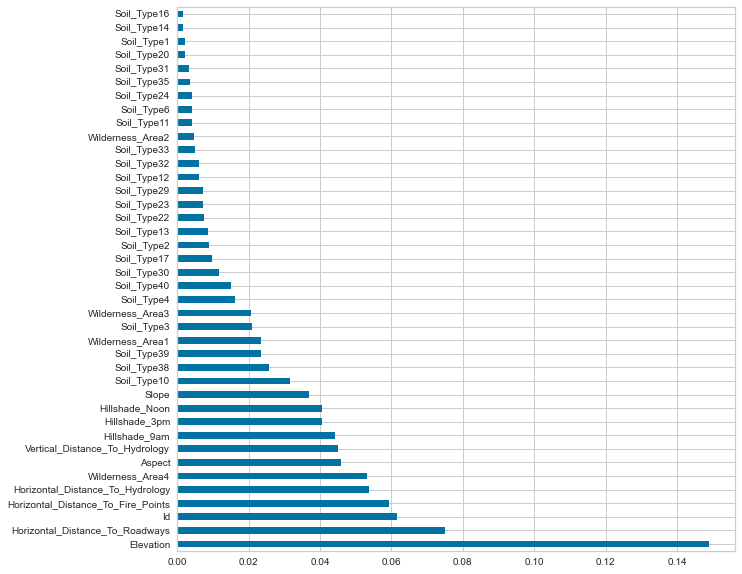

In [21]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
 
#plot the graph of feature importances 
fig, ax = plt.subplots(figsize=(10, 10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(40).plot(kind='barh')
plt.show()

In [22]:
pd.set_option('display.max_columns', None)
data_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


## <font color=green> 6.2. Number of feature selection  <font>

In [23]:
# no of maximum features we need to select
num_feats=46

We first fit a linear model to the initial dataset to have a baseline to evaluate the data cleaning and feature engineering impact.

To facilitate the training process, we will use the `sklearn` library <https://scikit-learn.org/stable/index.html> that provides a wrapper for the preprocessing, training, and evaluation of many machine learning algorithms. 

In [24]:
initial_lm_mod = linear_model.LogisticRegression(multi_class='multinomial',solver='saga',
   max_iter=1000, penalty='none',n_jobs=-1)

#initial_lm_mod = RandomForestRegressor(n_estimators=150)
baseline_acc = np.mean(
    cross_val_score(initial_lm_mod, X_train,y_train, cv=5))

print(f"Baseline model with Accuracy = {baseline_acc:.4}")

Baseline model with Accuracy = 0.7122


In [25]:
def get_feature_importance(clf, feature_names):
    """
    Function to print the most important features of a logreg classifier
    based on the coefficient values
    """
    return pd.DataFrame(
        {
            'variable': feature_names, # Feature names
            'coefficient': clf.coef_[0] # Feature Coeficients
        }
    ) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['red', 'green'], align='zero')

In [26]:
get_feature_importance(
    initial_lm_mod.fit(X_val,y_val), 
    X_train.columns.get_level_values(0).tolist()
)

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,variable,coefficient
1,Elevation,6.980000
41,Soil_Type27,3.820000
36,Soil_Type22,3.420000
11,Wilderness_Area1,2.800000
35,Soil_Type21,2.570000
26,Soil_Type12,2.290000
9,Hillshade_3pm,2.030000
47,Soil_Type33,1.630000
38,Soil_Type24,1.510000
34,Soil_Type20,1.410000


## <font color=green> Embedded Method <font>
## <font color=green> 6.4. Lasso Regularization <font>

When applying regularization to a Machine Learning model, we add a penalty to the model parameters to avoid that our model tries to resemble too closely our input data. In this way, we can make our model less complex and we can avoid overfitting (making learn to our model, not just the key data characteristics but also it’s intrinsic noise).
One of the possible Regularization Methods is Lasso (L1) Regression. When using Lasso Regression, the coefficients of the inputs features gets shrunken if they are not positively contributing to our Machine Learning model training. In this way, some of the features might get automatically discarded assigning them coefficients equal to zero.

In [27]:
lasso_mod = linear_model.LogisticRegression(penalty='l1', solver='liblinear')
print("Accuracy = {:.4}".format(np.mean(cross_val_score(lasso_mod, X_train, y_train, cv=5))))

Accuracy = 0.6774


In [28]:
get_feature_importance(lasso_mod.fit(X_train,y_train), X_train.columns.get_level_values(0).tolist())

,variable,coefficient
36,Soil_Type22,2.230000
1,Elevation,2.120000
35,Soil_Type21,2.040000
30,Soil_Type16,1.630000
34,Soil_Type20,1.560000
38,Soil_Type24,1.480000
37,Soil_Type23,1.400000
45,Soil_Type31,1.380000
47,Soil_Type33,1.230000
11,Wilderness_Area1,1.210000


Similar performance w.r.t the un-regularized models. However, you can see how the feature coefficients are smaller than the original ones, due to the regularization.

Let's look at how the coefficient weights and accuracy scores change along with the different regularization values.
To that end, I have implemented the following piece of code. Do not be overwhelmed by it. It basically defines a list of regularization values to test and train a new Logistic Regression model for one of these regularization values. We keep track of the coefficient values and the accuracy of each of these models to plot them according to the defined regularization parameters.

In [29]:
lasso_mod = linear_model.LogisticRegression(penalty='l1',solver='liblinear')
alphas = 10**np.linspace(-1,-4,100)

coefs_ = []
scores_ = []
for a in alphas:
    lasso_mod.set_params(C=a)
    scores_.append(np.mean(cross_val_score(lasso_mod, X_train, y_train, cv=5))) # Appends the accuracy of the model
    coefs_.append(lasso_mod.fit(X_train, y_train).coef_.ravel().copy()) # Appends the coefficient of the model

coefs_ = np.array(coefs_)
scores_ = np.array(scores_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Logistic Regression Path', fontsize=20)

# Coeff Weights Plot
ax1.plot(alphas, coefs_, marker='o')
ymin, ymax = plt.ylim()
ax1.set_ylabel('Coefficient Weights', fontsize = 15)
ax1.set_xlabel('log(C)', fontsize = 15)
ax1.axis('tight')

# Accuracy Plot
ax2.plot(alphas, scores_, marker='o')
ymin, ymax = plt.ylim()
ax2.set_ylabel('Accuracy Score', fontsize = 15)
ax2.set_xlabel('log(C)', fontsize = 15)
ax2.axis('tight')

plt.show()

KeyboardInterrupt: 

As you can see in the left figure, the smaller the alpha value (alpha), the larger the regularization and, consequently, the smaller the weights of the coefficients. This is because, if we check the sklearn documentation, we will see that this value is the: "Inverse of regularization strength."
When regularization is large enough (i.e., alpha is small), the values of the coefficients are close to 0 (i.e., null model).
As there is a trade-off between variance (i.e., less over-fitted model --> more regularization) and bias (i.e., learning more from the training set --> less regularization), You must find the optimal alpha value. As you can see in the right figure, this value is achieved with small alpha values (i.e., more regularization). This specific value is not always the same since it depends on your data and the prediction problem.
To automatize the process of finding the optimal value, you can make use of the LogisticRegressionCV function in sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) that performs CV, testing different hyperparameters (that you can provide) and selecting the optimal one.

In [30]:
embeded_lr_selector = SelectFromModel(LogisticRegression(C=0.04,penalty='l1',solver='liblinear',max_iter=1000,n_jobs=-1), max_features=num_feats)
embeded_lr_selector.fit(X_train, y_train)

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


SelectFromModel(estimator=LogisticRegression(C=0.04, max_iter=1000, n_jobs=-1,
                                             penalty='l1', solver='liblinear'),
                max_features=46)

In [31]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

37 selected features


In [32]:
embeded_lr_feature

['Id',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type6',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type17',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type35',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

## <font color=green> 6.3. Filter Method <font>
### <font color=green> 6.5. Anova F-value <font>
Chi-Square does not work because it needs non - negative values. For that reason we can use Anova. It is a univariate filter method that uses variance to find out the separability of the individual features between classes. It applies to multi-class endpoints.


In [33]:
#Code from class Forum, select the best features 
anov_selector = SelectKBest(f_classif, k=num_feats)
anov_selector.fit(X_train, y_train)

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [21 29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=46)

In [34]:
anov_support = anov_selector.get_support()
# Get  columns from original dataframe
anov_feature = X_train.iloc[:,anov_support].columns.tolist()
print(str(len(anov_feature)), 'selected features')


46 selected features


## <font color=green> 6.3. Filter Method <font>
### <font color=green> 6.5. Pearson correlation <font>

/Users/stephaniegessler/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


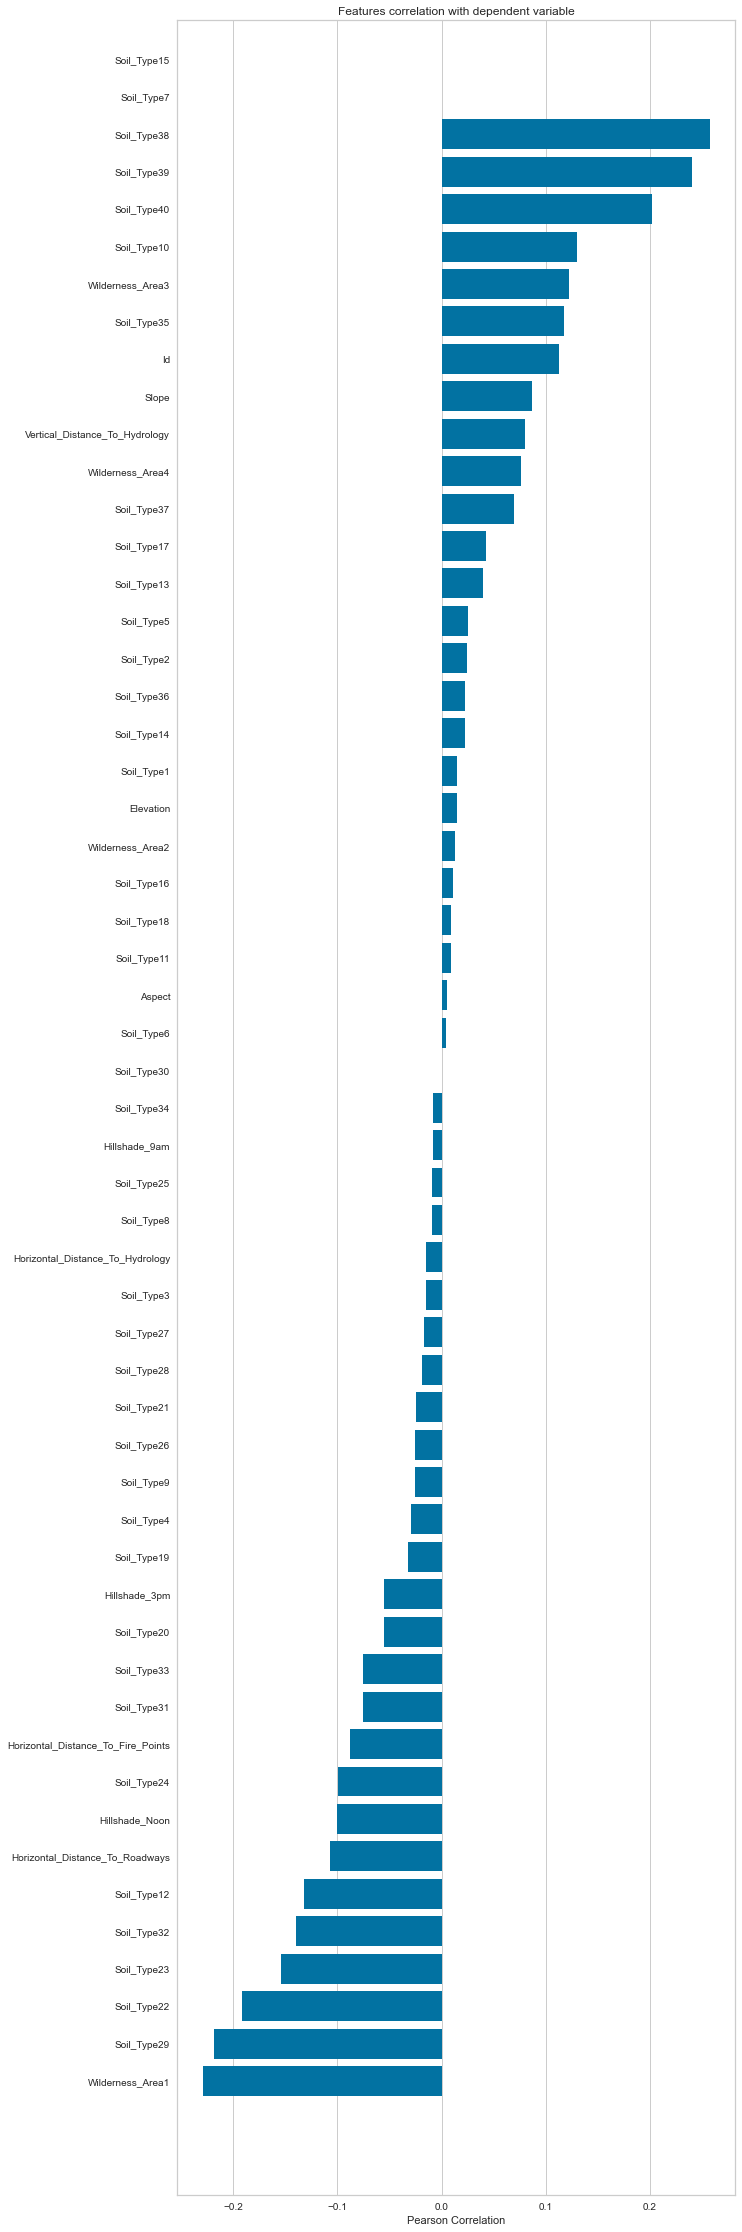

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [35]:
#X, y = data_train['data'], data_train['Cover_Type']

# Create a list of the feature names
#features = np.array(data['feature_names'])
fig, ax = plt.subplots(figsize=(10,40))         # Sample figsize in inches
# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=None,sort=True)

ax = visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [36]:
pd.set_option('display.max_columns', None)

In [37]:
corr = data_train.corrwith(data_train["Cover_Type"])
X_y = data_train.copy()
X_y['Cover_Type'] = y_train

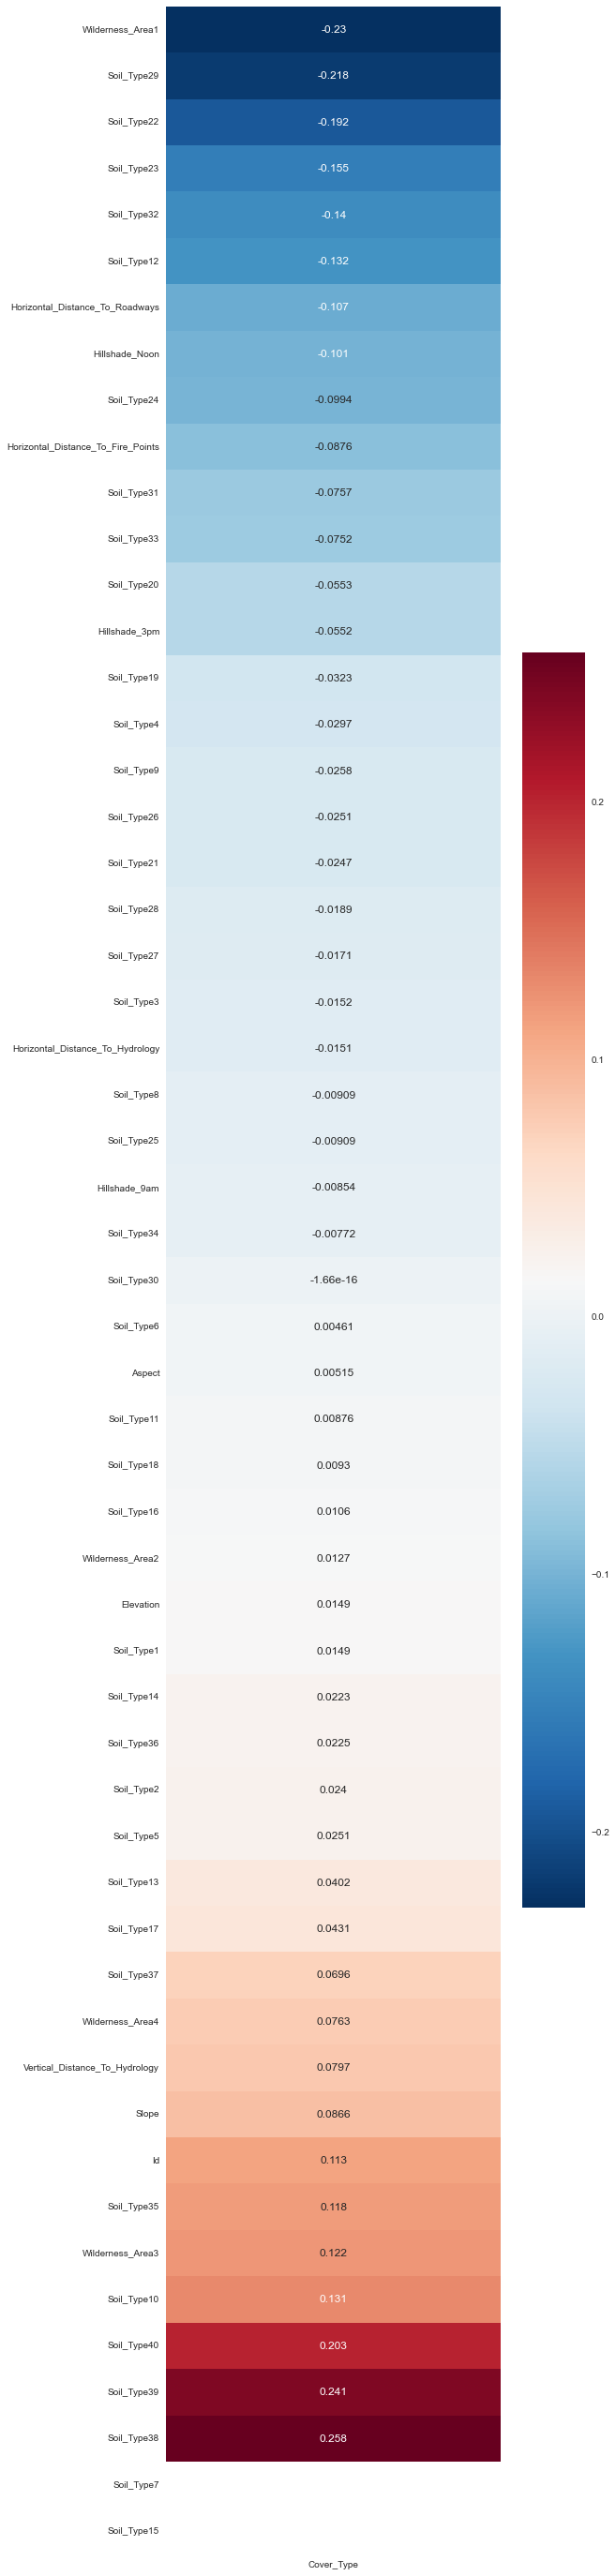

In [38]:
fig, ax = plt.subplots(figsize=(8,50))         # Sample figsize in inches

corr_matrix = X_y.corr()

# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['Cover_Type']].drop(labels=['Cover_Type'])
corr_target_sorted = corr_target.sort_values(by = 'Cover_Type')
sns.heatmap(corr_target_sorted, annot=True, fmt='.3', cmap='RdBu_r',ax=ax)
plt.show()

In [39]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X_train, y_train,num_feats)
print(str(len(cor_feature)), 'selected features')

46 selected features


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [40]:
cor_feature

['Soil_Type8',
 'Soil_Type18',
 'Soil_Type16',
 'Wilderness_Area2',
 'Elevation',
 'Soil_Type1',
 'Horizontal_Distance_To_Hydrology',
 'Soil_Type3',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type14',
 'Soil_Type36',
 'Soil_Type2',
 'Soil_Type21',
 'Soil_Type5',
 'Soil_Type26',
 'Soil_Type9',
 'Soil_Type4',
 'Soil_Type19',
 'Soil_Type13',
 'Soil_Type17',
 'Hillshade_3pm',
 'Soil_Type20',
 'Soil_Type37',
 'Soil_Type33',
 'Soil_Type31',
 'Wilderness_Area4',
 'Vertical_Distance_To_Hydrology',
 'Slope',
 'Horizontal_Distance_To_Fire_Points',
 'Soil_Type24',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Roadways',
 'Id',
 'Soil_Type35',
 'Wilderness_Area3',
 'Soil_Type10',
 'Soil_Type12',
 'Soil_Type32',
 'Soil_Type23',
 'Soil_Type22',
 'Soil_Type40',
 'Soil_Type29',
 'Wilderness_Area1',
 'Soil_Type39',
 'Soil_Type38']

## <font color=green> 6.5. Recursive Feature Elimination <font>

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [41]:
rfe_selector = RFE(estimator=LogisticRegression(max_iter=3000), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)

Fitting estimator with 55 features.


RFE(estimator=LogisticRegression(max_iter=3000), n_features_to_select=46,
    step=10, verbose=5)

In [42]:
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

46 selected features


In [43]:
rfe_feature

['Elevation',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [ ]:
from yellowbrick.model_selection import rfecv
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(5)
visualizer = rfecv(LogisticRegression(max_iter=3000), X=X_train, y=y_train, cv=cv, scoring='accuracy')

## <font color=green> 6.6. Tree-based: SelectFromModel <font>
### <font color=green> 6.6.1 RandomForestClassifier<font>
Embedded methods use algorithms that have built-in feature selection methods. We can also use RandomForest to select features based on feature importance. We calculate feature importance using node impurities in each decision tree. In Random forest, the final feature importance is the average of all decision tree feature importance.

In [ ]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X_train, y_train)

In [ ]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

In [ ]:
embeded_rf_feature

### <font color=green> 6.6.2 XgBoost <font>

XGBoost is relatively straightforward to retrieve importance scores for each attribute.

Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.


In [ ]:
#y_train needs to be transformed from 1,2,3,4,5,6,7 to 0 1 2 3 4 5,6
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)

model=xgb.XGBClassifier(learning_rate=0.1,n_estimators = 400,max_depth = 3,n_jobs=-1)

embeded_xgb_selector = SelectFromModel(model, max_features=num_feats)
embeded_xgb_selector.fit(X_train, y_train1)
#learning_rate=0.1,n_estimators = 400,max_depth = 3,n_jobs=-1

In [ ]:
embeded_xgb_support = embeded_xgb_selector.get_support()
embeded_xgb_feature = X_train.loc[:,embeded_xgb_support].columns.tolist()
print(str(len(embeded_xgb_feature)), 'selected features')

In [ ]:
embeded_xgb_feature

## <font color=green> End <font>

In [10]:
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X4[scale_numerical]=scaler.fit_transform(X4[scale_numerical])